# Exp8
 Create an ARIMA model for time series forecasting.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [ ]:
df = "GOOGL"
stock_data = yf.download(df, start="2015-01-01", end="2025-01-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
stock_data = stock_data.reset_index()

In [ ]:
# Resampling to monthly data
monthly_data = stock_data['Close'].resample('M').mean()

<ipython-input-11-0f3d5a491c29>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = stock_data['Close'].resample('M').mean()


In [ ]:
#train test split
train_data = monthly_data[:int(0.8*len(monthly_data))]
test_data = monthly_data[int(0.8*len(monthly_data)):]

In [ ]:
# ARIMA Model
arima_model = ARIMA(train_data, order=(1, 1, 1))  # p=1, d=1, q=1 as an example
fit_arima = arima_model.fit()
forecast_arima = fit_arima.forecast(steps=len(test_data))

In [ ]:
# (Seasonal) SARIMA Model
sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
fit_sarima = sarima_model.fit(disp=False)
forecast_sarima = fit_sarima.forecast(steps=len(test_data))

In [ ]:
# Calculate MSE for comparison
mse_arima = mean_squared_error(test_data, forecast_arima)
mse_sarima = mean_squared_error(test_data, forecast_sarima)

In [ ]:
print(f"Mean Squared Error (ARIMA): {mse_arima:.2f}")
print(f"Mean Squared Error (SARIMA): {mse_sarima:.2f}")

Mean Squared Error (ARIMA): 4788.21
Mean Squared Error (SARIMA): 6115.11


In [ ]:
future_steps = 24# Forecast for the next 12 months
future_forecast = fit_arima.forecast(steps=future_steps)

# Display future predictions
future_dates = pd.date_range(start=test_data.index[-1], periods=future_steps+1, freq='ME')[1:]
future_df = pd.DataFrame({'Date': future_dates, 'Forecasted Price': future_forecast})
print(future_df)


                 Date  Forecasted Price
2023-01-31 2025-01-31         89.684403
2023-02-28 2025-02-28         87.752746
2023-03-31 2025-03-31         86.050185
2023-04-30 2025-04-30         84.549550
2023-05-31 2025-05-31         83.226892
2023-06-30 2025-06-30         82.061102
2023-07-31 2025-07-31         81.033576
2023-08-31 2025-08-31         80.127916
2023-09-30 2025-09-30         79.329669
2023-10-31 2025-10-31         78.626094
2023-11-30 2025-11-30         78.005964
2023-12-31 2025-12-31         77.459382
2024-01-31 2026-01-31         76.977626
2024-02-29 2026-02-28         76.553006
2024-03-31 2026-03-31         76.178746
2024-04-30 2026-04-30         75.848874
2024-05-31 2026-05-31         75.558126
2024-06-30 2026-06-30         75.301860
2024-07-31 2026-07-31         75.075988
2024-08-31 2026-08-31         74.876904
2024-09-30 2026-09-30         74.701432
2024-10-31 2026-10-31         74.546772
2024-11-30 2026-11-30         74.410454
2024-12-31 2026-12-31         74.290303


In [ ]:
future_steps = 24# Forecast for the next 12 months
future_forecast = fit_sarima.forecast(steps=future_steps)

# Display future predictions
future_dates = pd.date_range(start=test_data.index[-1], periods=future_steps+1, freq='ME')[1:]
future_df = pd.DataFrame({'Date': future_dates, 'Forecasted Price': future_forecast})
print(future_df)


                 Date  Forecasted Price
2023-01-31 2025-01-31         87.428846
2023-02-28 2025-02-28         86.181884
2023-03-31 2025-03-31         82.273878
2023-04-30 2025-04-30         79.536844
2023-05-31 2025-05-31         74.813959
2023-06-30 2025-06-30         73.658837
2023-07-31 2025-07-31         74.374349
2023-08-31 2025-08-31         75.826739
2023-09-30 2025-09-30         71.249120
2023-10-31 2025-10-31         69.364952
2023-11-30 2025-11-30         69.437855
2023-12-31 2025-12-31         68.404900
2024-01-31 2026-01-31         66.781306
2024-02-29 2026-02-28         67.232794
2024-03-31 2026-03-31         64.782248
2024-04-30 2026-04-30         64.142749
2024-05-31 2026-05-31         62.129754
2024-06-30 2026-06-30         62.151497
2024-07-31 2026-07-31         64.025537
2024-08-31 2026-08-31         66.168795
2024-09-30 2026-09-30         63.548873
2024-10-31 2026-10-31         62.770107
2024-11-30 2026-11-30         64.189318
2024-12-31 2026-12-31         63.838677


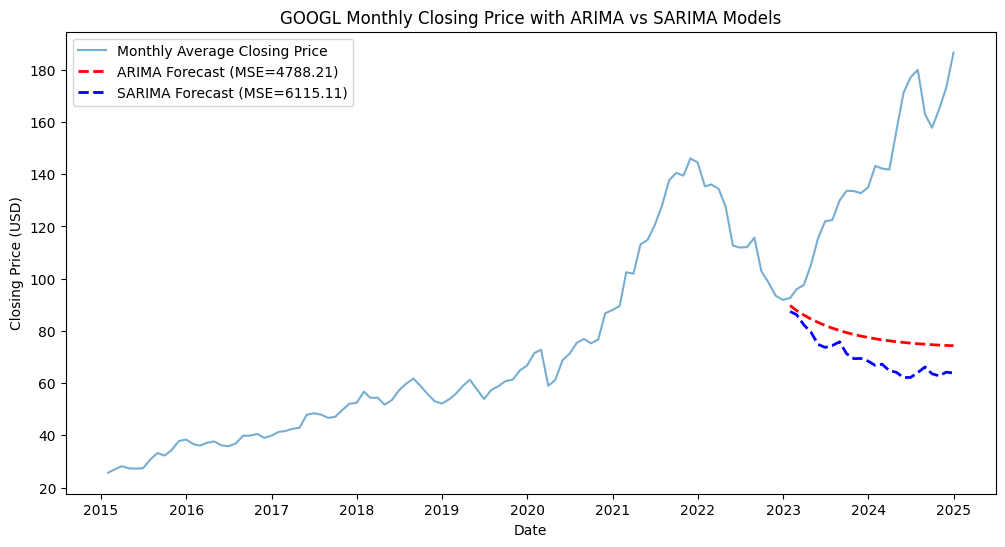

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Monthly Average Closing Price', alpha=0.6)
plt.plot(test_data.index, forecast_arima, label=f'ARIMA Forecast (MSE={mse_arima:.2f})', color='red', linestyle='--', linewidth=2)#(ARIMA Forecast)
plt.plot(test_data.index, forecast_sarima, label=f'SARIMA Forecast (MSE={mse_sarima:.2f})', color='blue', linestyle='--', linewidth=2)#(SARIMA Forecast)
plt.title('GOOGL Monthly Closing Price with ARIMA vs SARIMA Models')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()


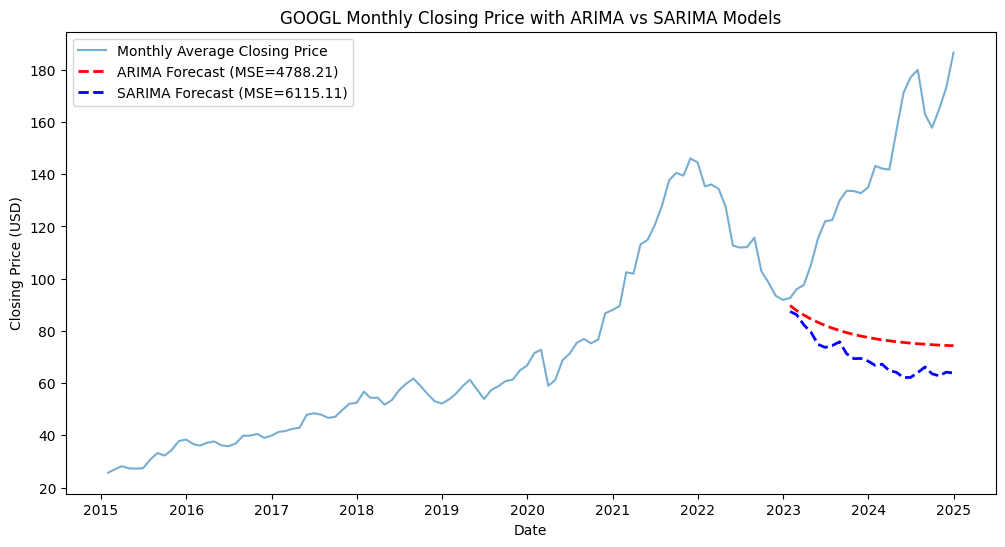

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Monthly Average Closing Price', alpha=0.6)
plt.plot(test_data.index, forecast_arima, label=f'ARIMA Forecast (MSE={mse_arima:.2f})', color='red', linestyle='--', linewidth=2)#(ARIMA Forecast)
plt.plot(test_data.index, forecast_sarima, label=f'SARIMA Forecast (MSE={mse_sarima:.2f})', color='blue', linestyle='--', linewidth=2)#(SARIMA Forecast)
plt.title('GOOGL Monthly Closing Price with ARIMA vs SARIMA Models')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# Evaluate the model
mae = mean_absolute_error(test_data, forecast_arima)
mse = mean_squared_error(test_data,forecast_arima)
rmse = np.sqrt(mse)
r2 = r2_score(test_data,forecast_arima)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 61.71
Mean Squared Error (MSE): 4788.21
Root Mean Squared Error (RMSE): 69.20
